# Day 8 - Multinomial Logistic Regression

What happens when the outcome has more than one type or class? Multinomial logistic regression uses softmax function. Softmax for the save!

This notebook demonstrates how to apply multinomial logistic regression using mock mission data. We simulate a dataset with a strong relationship between the `solar_activity,` `temperate ` and each mission type.

## Load & Prepare Data

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Simulate mission data
np.random.seed(42)
n_samples = 300

# Features
temperature = np.random.normal(loc=50, scale=10, size=n_samples)
solar_activity = np.random.normal(loc=30, scale=5, size=n_samples)

# Initialize mission types
mission_type = []

# Generate labels with stronger correlation between solar_activity and resupply
for t, s in zip(temperature, solar_activity):
    if s > 32:
        mission_type.append('Resupply')  # strongly correlated
    elif t < 45:
        mission_type.append('Rescue')
    else:
        mission_type.append('Exploration')

# Create DataFrame
df_mock = pd.DataFrame({
    'temperature': temperature,
    'solar_activity': solar_activity,
    'mission_type': mission_type
})

# Encode target
df_mock['mission_type_encoded'] = df_mock['mission_type'].map({
    'Rescue': 0,
    'Resupply': 1,
    'Exploration': 2
})

## Select features & Standardize

In [120]:
# Split data
X = df_mock[['temperature', 'solar_activity']]
y = df_mock['mission_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train with Logit Regression

In [121]:
# Train multinomial logistic regression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(scaler.transform(X_train), y_train)

LogisticRegression(multi_class='multinomial')

## Plot & Visualize

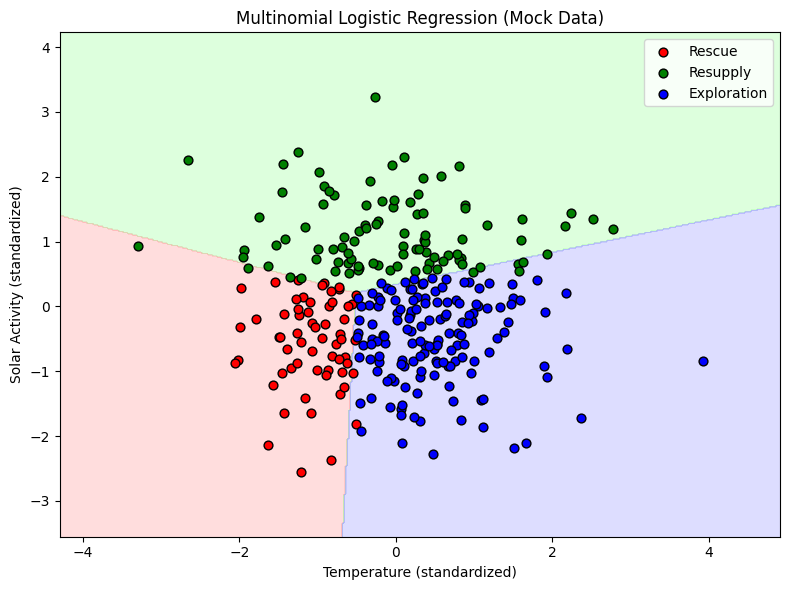

In [122]:
## Create decision boundary plot
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8, 6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
scatter_colors = ['red', 'green', 'blue']
labels = ['Rescue', 'Resupply', 'Exploration']

ax.contourf(xx, yy, Z, cmap=colors, alpha=0.4)
for i, label in enumerate(np.unique(y)):
    idx = np.where(y == i)
    ax.scatter(X_scaled[idx, 0], X_scaled[idx, 1], label=labels[i], edgecolor='k', s=40, c=scatter_colors[i])

ax.set_title("Multinomial Logistic Regression (Mock Data)")
ax.set_xlabel("Temperature (standardized)")
ax.set_ylabel("Solar Activity (standardized)")
ax.legend()
plt.tight_layout()
plt.show()

This plot shows how our multinomial logistic regression model classifies mission types (Exploration, Resupply, Rescue) based on two predictors: solar_activity and duration_days.

- Background Colors: Each colored region (blue, green, red) represents the model's predicted class for combinations of solar_activity and duration_days:
    - Blue: Exploration missions
    - Green: Resupply missions
    - Red: Rescue missions

- Dots:
    - 🟦 Blue dots = real Exploration missions
    - 🟩 Green dots = real Resupply missions
    - 🟥 Red dots = real Rescue missions

- Decision Boundaries:
    The curved lines between color regions indicate where the model is equally uncertain between two mission types (e.g., green vs. red). These are the thresholds the model has learned to separate mission categories.

# Takeaway

- Resupply missions (green) are more likely when solar_activity is high and duration_days is moderate — this is supported by the model’s boundary adapting to this simulated relationship.
- Rescue missions (red) cluster near shorter durations, possibly implying urgency.
- Exploration missions (blue) dominate areas with lower solar activity, aligning with safer conditions.

This decision surface gives us a powerful visualization of how the model is internally reasoning about which inputs lead to each type of mission.